In [44]:
import pandas as pd
import math
import numpy as np
from array import array
import matplotlib.pyplot as plt
from statistics import mode

In [2]:
data1=pd.read_csv("seeds.csv")
data1.head(10)

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area                    210 non-null float64
perimeter               210 non-null float64
compactness             210 non-null float64
lengthOfKernel          210 non-null float64
widthOfKernel           210 non-null float64
asymmetryCoefficient    210 non-null float64
lengthOfKernelGroove    210 non-null float64
seedType                210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
data1['seedType'].value_counts()

3    70
2    70
1    70
Name: seedType, dtype: int64

In [5]:
data1.shape

(210, 8)

In [6]:
data1.describe()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [7]:
data=data1.iloc[:,:-1].values
data_seed=data1.iloc[:,-1].values

In [8]:
def euclidean_distance(data):
    res=[]
    for i in range(len(data)):
        dist=[]
        for j in range (len(data)):
            temp=((data[i][0]-data[j][0])*2+(data[i][1]-data[j][1])*2+(data[i][2]-data[j][2])*2)*0.5
            dist.append(temp)
        res.append(dist)
    return res
from sklearn.metrics.pairwise import euclidean_distances

In [9]:
def predict1(intt,test1,y,k):
    dist=[]
    for i in range(0,len(intt)):
        ki1 = list(intt[i])
        distance=0
        for j in range(0,len(intt[0])):
            point1=np.square(float(ki1[j])-float(test1[j]))
            distance=distance+point1
        distance=np.sqrt(distance)
        dist.append(distance)
    dist_sort=sorted(dist)
    k1=dist_sort[:k]
    neigh=[]
    for i in k1:
        for j in dist:
            if i==j:
                neigh.append(dist.index(i))
    p=[]
    for i in neigh:
        p.append(y[i])
    return mode(p)

yclust5=[]
for i in range(0,len(data)):
    kp1=predict1(data,list(data[i]),data_seed,3)
    yclust5.append(kp1)
#print(yclust5)
final_res=np.array(yclust5)
print(final_res)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [10]:
def seed_clustering(data,clusters):
    eucl_dist=euclidean_distances(data)
    #print(eucl_dist)
    eucl_dist = np.tril(eucl_dist)
    eucl_dist[eucl_dist == 0] = np.inf
    data_frame = pd.DataFrame(data=np.ones(data.shape[0])*np.inf)
    #if linkage==1: #complete linkage
    d = {}
    for i in range(0,clusters):
        cluster_loop = np.unravel_index(eucl_dist.argmin(), eucl_dist.shape)
        if i == 0:
            data_frame.iloc[cluster_loop[0]] = 0
            data_frame.iloc[cluster_loop[1]] = 0
        else:
            try:
                a = int(data_frame.iloc[cluster_loop[0]])
            except:
                data_frame.iloc[cluster_loop[0]] = i
                a = i
            try:
                b = int(data_frame.iloc[cluster_loop[1]])
            except:
                data_frame.iloc[cluster_loop[1]] = i
                b = i
            data_frame[(data_frame[0]==a) | (data_frame[0]==b)] = i
        d[i] = cluster_loop
        for j in range(0, cluster_loop[0]):
            if np.isfinite(eucl_dist[cluster_loop[0]][j]) and np.isfinite(eucl_dist[cluster_loop[1]][j]):
                eucl_dist[cluster_loop[1]][j] = max(eucl_dist[cluster_loop[0]][j], eucl_dist[cluster_loop[1]][j])
            eucl_dist[cluster_loop[0]] = np.inf
    return d, data_frame[0].as_matrix()

In [11]:
forming_clusters5, rest_feature1 = seed_clustering(data, 206) 

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [12]:
forming_clusters5

{0: (206, 172),
 1: (198, 148),
 2: (133, 122),
 3: (28, 7),
 4: (138, 137),
 5: (49, 34),
 6: (67, 33),
 7: (209, 200),
 8: (92, 91),
 9: (14, 13),
 10: (130, 123),
 11: (163, 147),
 12: (103, 96),
 13: (127, 101),
 14: (47, 44),
 15: (68, 66),
 16: (193, 177),
 17: (182, 162),
 18: (208, 192),
 19: (131, 73),
 20: (172, 168),
 21: (169, 153),
 22: (157, 152),
 23: (55, 34),
 24: (104, 92),
 25: (202, 191),
 26: (200, 143),
 27: (158, 144),
 28: (181, 166),
 29: (166, 152),
 30: (7, 2),
 31: (75, 71),
 32: (128, 90),
 33: (174, 149),
 34: (57, 1),
 35: (58, 0),
 36: (117, 73),
 37: (176, 173),
 38: (160, 148),
 39: (45, 11),
 40: (178, 173),
 41: (21, 7),
 42: (177, 175),
 43: (161, 144),
 44: (5, 2),
 45: (106, 91),
 46: (156, 153),
 47: (122, 100),
 48: (183, 150),
 49: (168, 154),
 50: (41, 40),
 51: (48, 47),
 52: (191, 172),
 53: (201, 65),
 54: (79, 37),
 55: (125, 116),
 56: (65, 42),
 57: (173, 155),
 58: (107, 76),
 59: (155, 145),
 60: (111, 96),
 61: (119, 108),
 62: (53, 2

In [13]:
rest_feature1

array([205., 205., 205., 205., 205., 205., 205., 205., 205., 205., 205.,
       205., 205., 205., 205., 205., 205., 205., 205., 205., 205., 205.,
       205., 199., 205., 205., 205., 205., 205., 205., 205., 205., 205.,
       205., 205., 205., 205., 205., 205., 205., 205., 205., 205., 205.,
       205., 205., 205., 205., 205., 205., 205., 205., 205., 205., 205.,
       205., 205., 205., 205., 199., 199., 199., 205., 205., 205., 205.,
       205., 205., 205., 205., 205., 205., 205., 202., 205., 205., 205.,
       191., 205., 205., 205., 205., 191., 202., 202., 202., 202., 202.,
       191., 191., 202., 202., 202., 205., 205., 205., 202., 202., 202.,
       202., 205., 202., 202., 202., 202., 202., 202., 205., 202., 202.,
       202., 202., 202., 205., 191., 202., 202., 202., 202., 202., 191.,
       205., 205., 202., 205., 202., 202., 202., 202., 205., 202., 202.,
       205., 205., 205., 205., 205., 205., 205., 205., 205., 205., 205.,
       205., 205., 205., 199., 205., 205., 205., 20

In [14]:
#4 clusters
rest_feature1[rest_feature1==205]=1
rest_feature1[rest_feature1==202]=2
rest_feature1[rest_feature1==199]=3
rest_feature1[rest_feature1==191]=4
rest_feature1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 4., 1., 1., 1., 1., 4., 2., 2.,
       2., 2., 2., 4., 4., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 4., 2., 2., 2., 2.,
       2., 4., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 3.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 1., 3., 1.])

In [36]:
100 - (final_res != rest_feature1).sum()/float(final_res.size)*100

51.42857142857143

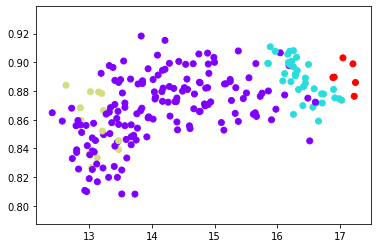

In [46]:
plt.scatter(data[:,1], data[:,2], c=rest_feature1, cmap="rainbow")

In [63]:
forming_clusters10, rest_feature2 = seed_clustering(data, 208) 

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [64]:
forming_clusters10

{0: (206, 172),
 1: (198, 148),
 2: (133, 122),
 3: (28, 7),
 4: (138, 137),
 5: (49, 34),
 6: (67, 33),
 7: (209, 200),
 8: (92, 91),
 9: (14, 13),
 10: (130, 123),
 11: (163, 147),
 12: (103, 96),
 13: (127, 101),
 14: (47, 44),
 15: (68, 66),
 16: (193, 177),
 17: (182, 162),
 18: (208, 192),
 19: (131, 73),
 20: (172, 168),
 21: (169, 153),
 22: (157, 152),
 23: (55, 34),
 24: (104, 92),
 25: (202, 191),
 26: (200, 143),
 27: (158, 144),
 28: (181, 166),
 29: (166, 152),
 30: (7, 2),
 31: (75, 71),
 32: (128, 90),
 33: (174, 149),
 34: (57, 1),
 35: (58, 0),
 36: (117, 73),
 37: (176, 173),
 38: (160, 148),
 39: (45, 11),
 40: (178, 173),
 41: (21, 7),
 42: (177, 175),
 43: (161, 144),
 44: (5, 2),
 45: (106, 91),
 46: (156, 153),
 47: (122, 100),
 48: (183, 150),
 49: (168, 154),
 50: (41, 40),
 51: (48, 47),
 52: (191, 172),
 53: (201, 65),
 54: (79, 37),
 55: (125, 116),
 56: (65, 42),
 57: (173, 155),
 58: (107, 76),
 59: (155, 145),
 60: (111, 96),
 61: (119, 108),
 62: (53, 2

In [65]:
rest_feature2

array([207., 207., 207., 207., 207., 207., 207., 207., 207., 207., 207.,
       207., 207., 207., 207., 207., 207., 207., 207., 207., 207., 207.,
       207., 207., 207., 207., 207., 207., 207., 207., 207., 207., 207.,
       207., 207., 207., 207., 207., 207., 207., 207., 207., 207., 207.,
       207., 207., 207., 207., 207., 207., 207., 207., 207., 207., 207.,
       207., 207., 207., 207., 207., 207., 207., 207., 207., 207., 207.,
       207., 207., 207., 207., 207., 207., 207., 207., 207., 207., 207.,
       191., 207., 207., 207., 207., 191., 207., 207., 207., 207., 207.,
       191., 191., 207., 207., 207., 207., 207., 207., 207., 207., 207.,
       207., 207., 207., 207., 207., 207., 207., 207., 207., 207., 207.,
       207., 207., 207., 207., 191., 207., 207., 207., 207., 207., 191.,
       207., 207., 207., 207., 207., 207., 207., 207., 207., 207., 207.,
       207., 207., 207., 207., 207., 207., 207., 207., 207., 207., 207.,
       207., 207., 207., 207., 207., 207., 207., 20

In [66]:
rest_feature2[rest_feature2==207]=1
rest_feature2[rest_feature2==191]=2
rest_feature2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

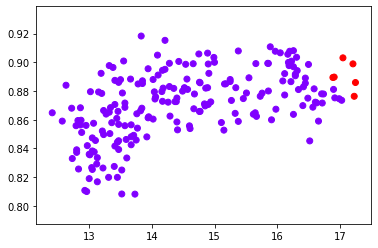

In [67]:
plt.scatter(data[:,1], data[:,2], c=rest_feature2, cmap="rainbow")

In [68]:
100-(final_res != rest_feature2).sum()/float(final_res.size)*100

34.76190476190476